In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import re
import seaborn as sns
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import itertools
from sklearn.ensemble import RandomForestRegressor

# --------cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# -------- classification
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
# *** KNN
from sklearn.neighbors import KNeighborsClassifier
# *** Decision Tree; Random Forest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# *** Naive Bayes
from sklearn.naive_bayes import GaussianNB
# *** SVM classifier
from sklearn.svm import SVC
# --------  metrics:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,r2_score
from sklearn.metrics import make_scorer



In [2]:
import time

import sklearn
from sklearn import cluster

from sklearn import metrics, preprocessing, neighbors, cluster
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_samples, silhouette_score



In [4]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

DRIVER_PATH=r'C:\Users\שמעון\Downloads\chromedriver.exe'
driver = webdriver.Chrome(executable_path=DRIVER_PATH)
driver.get('https://google.com')
options = Options()
options.headless = True
options.add_argument("--window-size=1920,1200")
driver.get("https://gadgets.ndtv.com/mobiles/phone-finder")
for i in range (305):
    driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//a[@class='load-more _btn']"))))
    time.sleep(5)
elem_list = driver.find_elements_by_class_name('_flspc')
url_list=[i.get_attribute('href') for i in elem_list]
print(len(elem_list))
print(len(url_list))
print(url_list)
driver.quit()


In [ ]:
import warnings
warnings.filterwarnings('ignore')

result=pd.DataFrame()
for phone in range(len(url_list)):
    try:
        DRIVER_PATH=r'C:\Users\שמעון\Downloads\chromedriver.exe'
        driver = webdriver.Chrome(executable_path=DRIVER_PATH)
        driver.get('https://google.com')
        options = Options()
        options.headless = True
        options.add_argument("url_list--window-size=1920,1200")
        driver.get(url_list[phone])
        data=[]
        dic={}
        for i in range(1,10):
            try:
                rows = len(driver.find_elements_by_xpath('//*[@id="specs"]/div[{}]/table/tbody/tr'.format(i)))
                exc_num=0
                for j in range(1,rows):
                    try:
                        criteria=driver.find_element_by_xpath('//*[@id="specs"]/div[{}]/table/tbody/tr[{}]/td[1]'.format(i,j)).text
                        value=driver.find_element_by_xpath('//*[@id="specs"]/div[{}]/table/tbody/tr[{}]/td[2]'.format(i,j)).text
                        if(exc_num<=1):
                            dic[criteria]=value
                        else:
                            dic[criteria+"_"+str(exc_num)]=value       
                    except:
                        if (criteria=="SIM 1")|(criteria=="SIM 2")|(criteria=="SIM 3"):
                            exc_num=exc_num+1
                        continue 
            except:
                break
        dic['url']=url_list[phone]
        dic['rating']=driver.find_element_by_class_name('_rtxt').text
        data.append(dic)
        df=pd.DataFrame(data)
        result=result.append(df, ignore_index=True)
        time.sleep(3)
        driver.quit()
        print(phone)
    except:
        num=phone
        break


In [ ]:
#result.to_csv(r'C:\Users\chen0\Downloads\phone_rawupdated.csv',encoding='utf-8')//no to run

In [3]:
df=pd.read_csv(r'C:\Users\chen0\Downloads\phone_rawupdated.csv')

In [4]:
df=df.dropna(axis=1,thresh=4000)
df=df.drop(['Unnamed: 0.1','Unnamed: 0','Supports 4G in India (Band 40)','Expandable storage type',"Processor make",'Dimensions (mm)'],axis=1)
df=df.dropna(axis=0,thresh=7)
df=df.dropna(axis=0,subset=['Model','Price in India'])
df=df.drop_duplicates()
df= df.reset_index(drop=True)


In [5]:
def extract_release(df):
    for i in range(df.shape[0]):
            if re.search(r' \d\d\d\d',str(df["Release date"][i])):
                df["Release date"][i]=re.search(r' (\d\d\d\d)',str(df["Release date"][i])).group(1)
            elif re.search(r'-\d\d',str(df["Release date"][i])):
                df["Release date"][i]="20"+re.search(r'-(\d\d)',str(df["Release date"][i])).group(1)
            else:
                df["Release date"][i]="unknown"
    return df

In [6]:
def extract_rating(df):
    for i in range(df.shape[0]):
            if re.search(r'\d[.]\d',str(df['rating'][i])):
                df['rating'][i]=float(re.search(r'\d[.]\d',str(df['rating'][i])).group(0))
            else:
                df['rating'][i]=0
    return df

In [7]:
def extract_int(df,int_lst):
    for col in int_lst:
        for i in range(df.shape[0]):
            if re.search(r'(\d+)GB',str(df[col][i])):
                df[col][i]=int(re.search(r'(\d+)GB',str(df[col][i])).group(1))
            elif re.search(r'(\d+)MB',str(df[col][i])):
                df[col][i]=int(re.search(r'(\d+)MB',str(df[col][i])).group(1))/1000
            elif re.search(r'(\d+)[\D]',str(df[col][i])):
                df[col][i]=int(re.search(r'(\d+)[\D]',str(df[col][i])).group(1))
                
    return df

In [8]:
def split_processor(df):
    df["processor_core"]=pd.Series()
    df["processor_frequency"]=pd.Series()
    for i in range(df.shape[0]):
            if re.search(r'\d[.]\d',str(df['Processor'][i])):
                df["processor_frequency"][i]=float(re.search(r'\d[.]\d',str(df['Processor'][i])).group(0))
            elif re.search(r'(\d)\D',str(df['Processor'][i])):
                    df["processor_frequency"][i]=float(re.search(r'(\d)\D',str(df['Processor'][i])).group(1))
            else:
                df["processor_frequency"][i]=np.nan
            if re.search(r'\w+-',str(df['Processor'][i])):
                df["processor_core"][i]=re.search(r'(\w+)-',str(df['Processor'][i])).group(1)
            else:
                df["processor_core"][i]="unknown"
            
    return df.drop(['Processor'],axis=1)

In [9]:
def extr_price(df):
    for i in range(len(df["Price in India"])):
        df["Price in India"][i] = df["Price in India"][i].split('₹')[1].replace(',','')
    return df

In [10]:
def extract_float(df,list1):
    df[list1] = df[list1].apply(pd.to_numeric,errors='coerce')
    return df

In [11]:
print(df.columns)
df=extract_release(df)
df=extract_rating(df)
df=split_processor(df)
df=extr_price(df)
df=extract_int(df,['RAM', 'Internal storage', 'Rear camera'])
df=extract_float(df,['Weight (g)','RAM', 'Price in India','Internal storage','Rear camera',"processor_frequency",'rating','Battery capacity (mAh)'])

Index(['Brand', 'Model', 'Price in India', 'Release date', 'Form factor',
       'Weight (g)', 'Battery capacity (mAh)', 'Screen size (inches)',
       'Touchscreen', 'Processor', 'RAM', 'Internal storage', 'Rear camera',
       'Rear flash', 'Wi-Fi', 'GPS', 'Bluetooth', 'NFC', 'Infrared', 'USB OTG',
       'Headphones', 'FM', 'Number of SIMs', 'Wi-Fi Direct',
       'Mobile High-Definition Link (MHL)', 'SIM Type', 'GSM/CDMA', '3G',
       '4G/ LTE', 'Compass/ Magnetometer', 'Proximity sensor', 'Accelerometer',
       'Ambient light sensor', 'Gyroscope', 'Barometer', 'url', 'rating',
       'Expandable storage', 'SIM Type_2', 'GSM/CDMA_2', '3G_2', '4G/ LTE_2'],
      dtype='object')


In [12]:
def mean_rep(df,lst_mean):
    for i in lst_mean:
        df[i].fillna(df[i].mean(),inplace=True)
    return df

In [13]:
def mode_rep(df,lst_mode):
    for i in lst_mode:
        df[i] = df[i].fillna(df[i].mode()[0])
    return df

In [14]:
def median_comp(df,lst_median):
    for col in lst_median:
        for i in df[df[col].isnull()].index:
            df[col][i]=df[col][df['Release date']==df['Release date'][i]].median()
    return df

In [15]:
def no_comp(df,no_lst):
    df[no_lst] = df[no_lst].fillna(value="No")
    return df

In [16]:
def replace_core(df):
    dict1={'one':1,'dual':2,'quad':4,'hexa':6,'octa':8,'unknown':np.nan}
    df['processor_core'].replace(to_replace=dict1,inplace=True)
    df=extract_float(df,['processor_core'])
    df.dropna(axis=0,subset=['processor_core'],inplace=True)
    return df.reset_index(drop=True)

In [17]:
no_lst=['Wi-Fi', 'GPS', 'Bluetooth', 'NFC', 'Infrared','Rear flash', 'USB OTG','Mobile High-Definition Link (MHL)','3G_2', '4G/ LTE_2','Gyroscope', 'Barometer','3G',
       '4G/ LTE',"Expandable storage","Wi-Fi Direct"]

mode_lst=['Headphones',
       'FM', 'Number of SIMs','SIM Type', 'GSM/CDMA','Compass/ Magnetometer', 'Proximity sensor', 'Accelerometer',
       'Ambient light sensor','SIM Type_2', 'GSM/CDMA_2','Touchscreen','Form factor']

median_lst=['Battery capacity (mAh)','Internal storage','Rear camera','RAM','processor_frequency']

mean_lst=['Weight (g)','Screen size (inches)']

df=mode_rep(df,mode_lst)
df=median_comp(df,median_lst)
df=mean_rep(df,mean_lst)
df=replace_core(df)
df=no_comp(df,no_lst)

In [18]:
def outliers_finder(df,numerical_lst):
    all_outlier_rows = []
    for col in numerical_lst:
        z_score = (df[col] - df[col].mean()) / df[col].std()
        outliers = abs(z_score) > 3
        df[col][np.where(outliers)[0]]=np.nan
    df[(df["processor_frequency"]<1)|(df["processor_frequency"]>3)]=np.nan
    df=df.dropna(axis=0,thresh=43)
    return df.reset_index(drop=True)
        

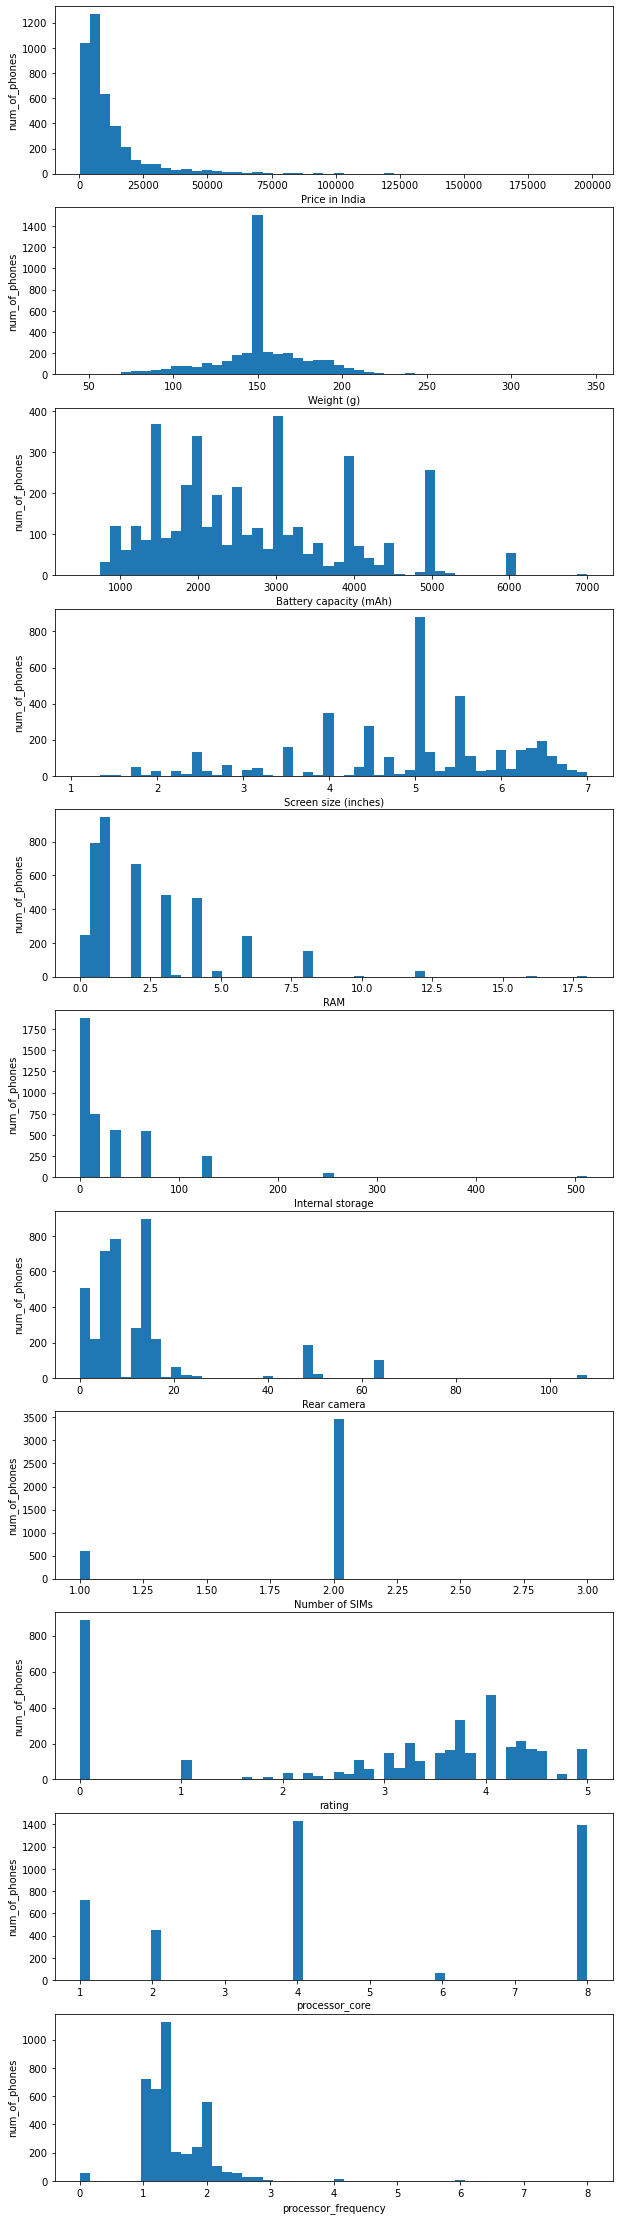

In [20]:
fig, axes = plt.subplots(df.describe().shape[1], figsize=(10,40))
for i,j in enumerate(df.describe()):    
    axes[i].hist(df[j], bins=50)
    axes[i].set(xlabel=j, ylabel='num_of_phones')
df=outliers_finder(df,['Screen size (inches)','Price in India'])


Text(0.5, 1.0, 'count by brand')

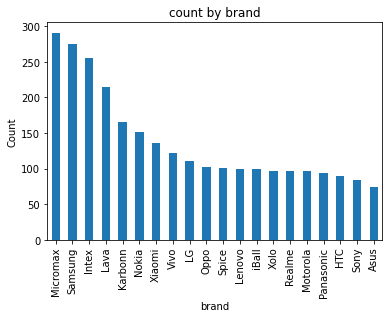

In [21]:
df["Brand"].value_counts().nlargest(n=20).plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('brand')
plt.title('count by brand')


Text(0.5, 1.0, 'phone by years')

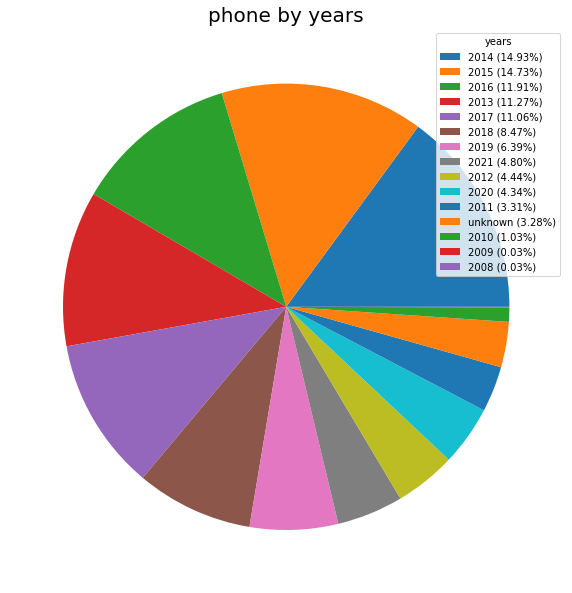

In [22]:
df["Release date"].value_counts().plot(kind="pie",labels=None,figsize=(10,40))
legend = ['{} ({:.2%})'.format(idx, value) for idx, value in zip(df["Release date"].value_counts().index, df["Release date"].value_counts()/df.shape[0])]
plt.legend(legend,title="years",prop={"size":10},loc="upper right")
plt.ylabel("")
plt.title('phone by years',{"size":20})

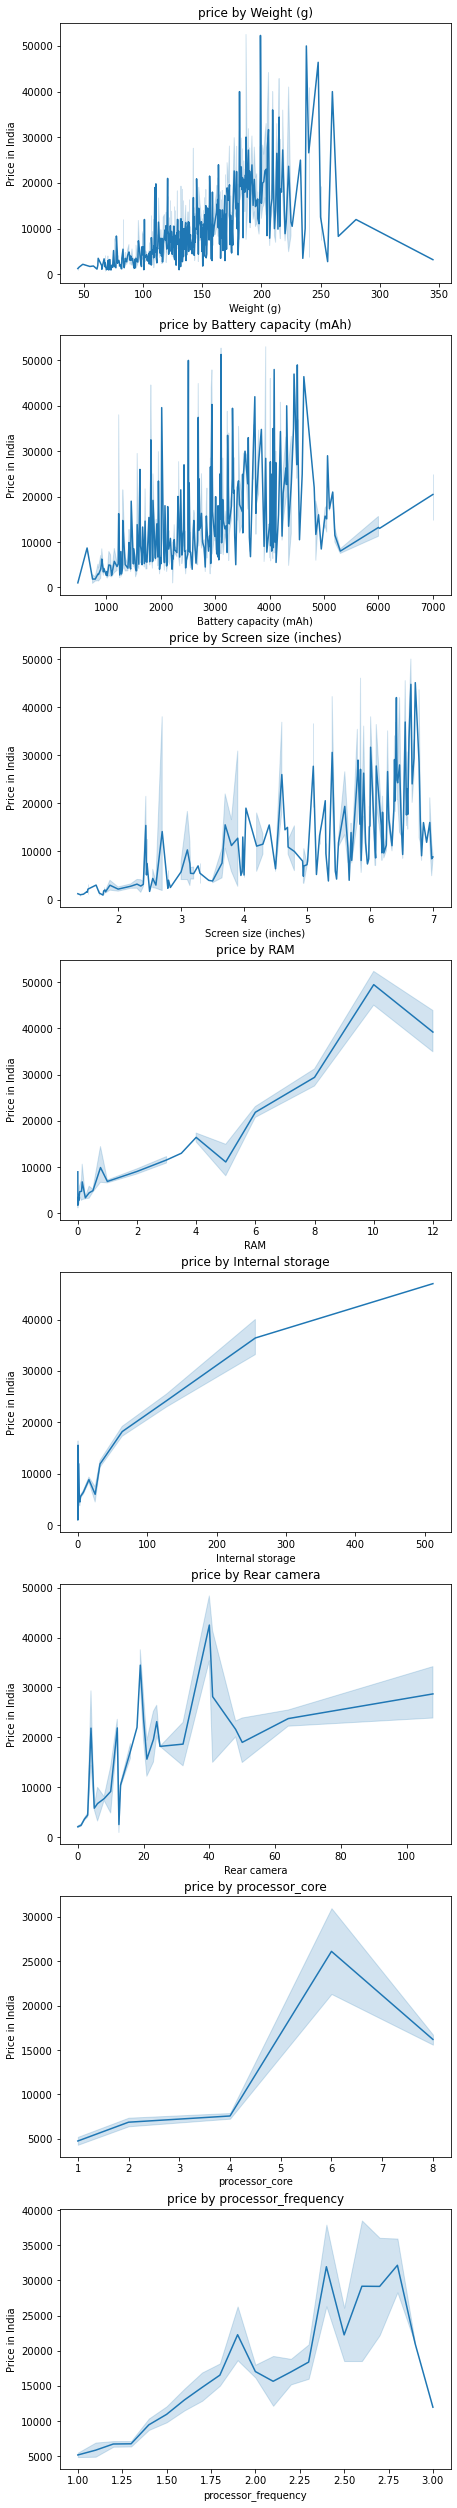

In [23]:
hardware=[ 'Weight (g)', 'Battery capacity (mAh)', 'Screen size (inches)','RAM', 'Internal storage', 'Rear camera',
       'processor_core', 'processor_frequency']
fig, axes = plt.subplots(len(hardware), figsize=(7,45))
for i,j in enumerate(hardware): 
    axes[i].title.set_text('price by '+j)
    sns.lineplot(data=df,x=j,y='Price in India',ax=axes[i])

<AxesSubplot:xlabel='rating', ylabel='Price in India'>

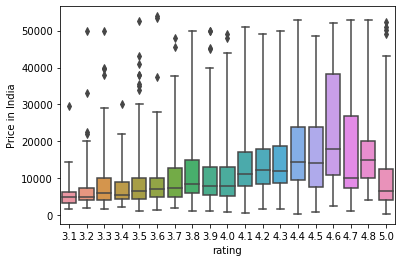

In [24]:
x=df["Brand"].value_counts().nlargest(n=20)
sns.boxplot(df['rating'][df['rating']>3],df['Price in India'],whis=4)


In [25]:
group=df.groupby("Brand")
group.mean()

,Price in India,Weight (g),Battery capacity (mAh),Screen size (inches),RAM,Internal storage,Rear camera,Number of SIMs,rating,processor_core,processor_frequency
Brand,,,,,,,,,,,
10.or,6149.000000,153.907931,3940.000000,5.566000,3.200000,36.800000,13.600000,2.000000,3.700000,6.400000,1.480000
AOC,3207.500000,152.769829,1850.000000,5.000000,0.512000,6.000000,3.500000,1.500000,0.500000,2.000000,1.250000
Acer,10312.833333,155.179886,2695.000000,5.083333,2.166667,20.000000,8.833333,1.666667,2.350000,4.833333,1.283333
Adcom,3620.888889,150.795403,1733.333333,4.200000,0.452444,2.837333,3.666667,1.555556,0.822222,2.000000,1.144444
Alcatel,9672.233333,143.015604,2401.333333,5.033333,1.672533,13.341867,9.366667,1.500000,1.876667,4.600000,1.316667
...,...,...,...,...,...,...,...,...,...,...,...
iBall,5211.515152,149.753284,1809.393939,4.307248,0.847111,6.146606,6.353535,1.969697,1.612121,3.060606,1.216162
iBerry,13420.000000,145.591380,2887.857143,5.071429,1.714286,9.714286,11.142857,2.000000,2.142857,6.285714,1.457143
iQOO,28990.000000,199.375000,4450.000000,6.622500,7.500000,80.000000,56.000000,2.000000,4.225000,8.000000,2.050000


In [26]:
df.columns

Index(['Brand', 'Model', 'Price in India', 'Release date', 'Form factor',
       'Weight (g)', 'Battery capacity (mAh)', 'Screen size (inches)',
       'Touchscreen', 'RAM', 'Internal storage', 'Rear camera', 'Rear flash',
       'Wi-Fi', 'GPS', 'Bluetooth', 'NFC', 'Infrared', 'USB OTG', 'Headphones',
       'FM', 'Number of SIMs', 'Wi-Fi Direct',
       'Mobile High-Definition Link (MHL)', 'SIM Type', 'GSM/CDMA', '3G',
       '4G/ LTE', 'Compass/ Magnetometer', 'Proximity sensor', 'Accelerometer',
       'Ambient light sensor', 'Gyroscope', 'Barometer', 'url', 'rating',
       'Expandable storage', 'SIM Type_2', 'GSM/CDMA_2', '3G_2', '4G/ LTE_2',
       'processor_core', 'processor_frequency'],
      dtype='object')

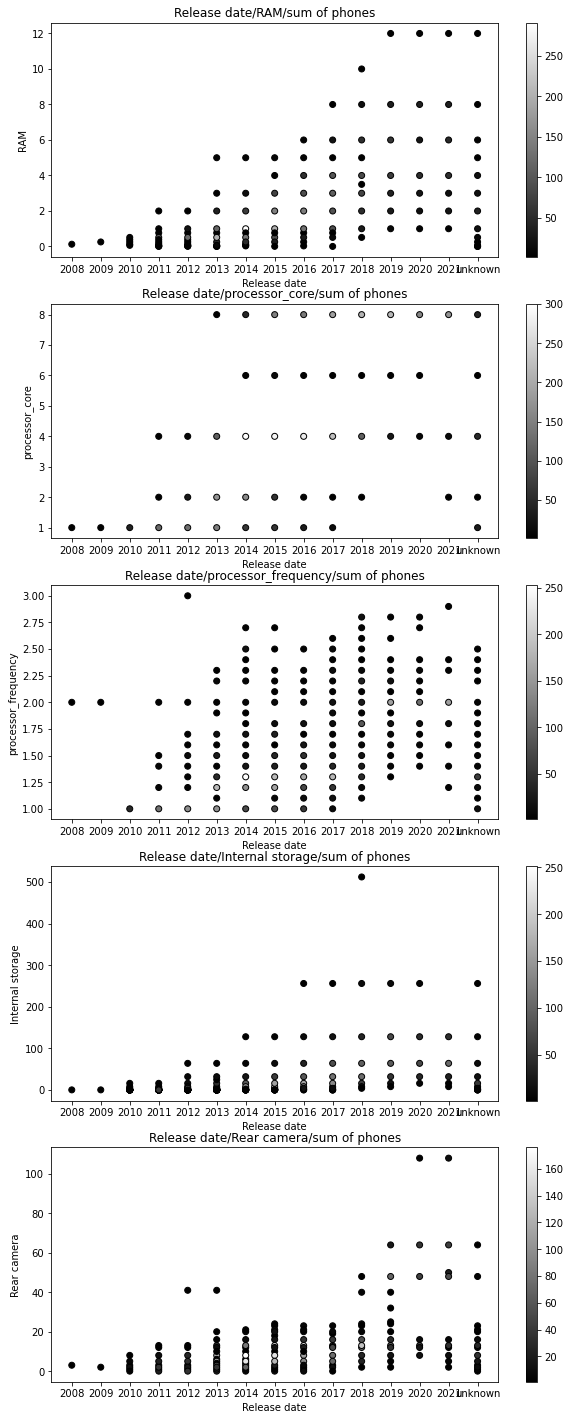

In [27]:
k=['RAM', 'processor_core','processor_frequency','Internal storage','Rear camera']
fig, axes = plt.subplots(len(k), figsize=(10,25))
for i,j in enumerate(k):
    lst=df[["Release date",j]].value_counts().index
    r=lst.to_frame(name=["release date",j])
    r["counts"]=df[["Release date",j]].value_counts()
    r=r.sort_values("release date")
    x=axes[i].scatter(x=r["release date"],y=r[j],c=r["counts"], cmap="gray",edgecolors='black')
    fig.colorbar(x,ax=axes[i])
    axes[i].title.set_text("Release date/"+j+'/sum of phones')
    axes[i].set_xlabel("Release date")
    axes[i].set_ylabel(j)
    

In [68]:
#sns.jointplot(x=df['rating'][df['rating']>3], y=df['Price in India'], kind='reg', color="#4CB391")

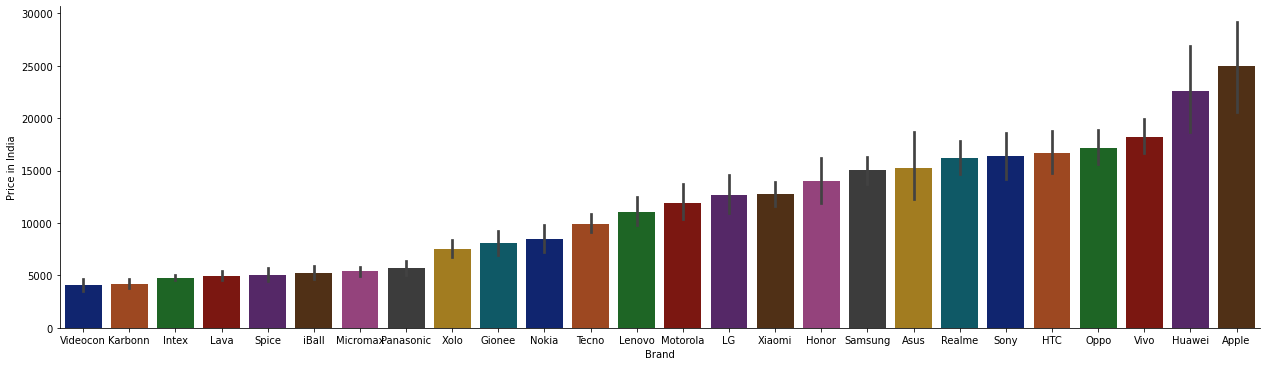

In [28]:
df12=pd.DataFrame()
largest_brands=df["Brand"].value_counts().nlargest(n=26).index
for i in largest_brands:
    df12=df12.append(df[df["Brand"]==i],ignore_index = True)
order = df12.groupby(["Brand"])["Price in India"].mean().sort_values().index
sns.catplot(data=df12, kind="bar",x=df12["Brand"], y=df12["Price in India"], palette="dark", height=5,aspect=3.5,order=order)

<AxesSubplot:xlabel='Price in India', ylabel='Release date'>

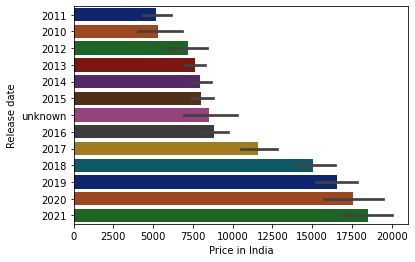

In [29]:
order = df12.groupby(['Release date'])["Price in India"].mean().sort_values().index
sns.barplot(data=df12,x='Price in India',y=df12['Release date'].sort_values(), palette="dark",order=order)

In [72]:
df_linear=df.drop(['rating','url'],axis=1)

In [73]:
def transfer_str_to_numeric_vals(df,str_col_list):
    dataset_new=df.copy()
    for str_col in str_col_list:
        tabs=dataset_new[str_col].astype('category').cat.categories.tolist()
        new={str_col:{x: y for x,y in zip(tabs,list(range(0,len(tabs)+1)))}}
        dataset_new.replace(new,inplace=True)
    return dataset_new

In [74]:
def split_and_train_df(df, target_column):
    y=df[target_column]
    X=df.drop(target_column, axis=1)
    X_train, X_test, y_train, y_test=train_test_split(X, y , test_size=0.3,random_state=43)
    trained_model=linear_model.LinearRegression(normalize=True).fit(X_train, y_train)
    return X_train, X_test, y_train, y_test, trained_model
    

In [75]:
str_col_list=list(df_linear.select_dtypes(['object']).columns)
df_linear=transfer_str_to_numeric_vals(df_linear,str_col_list)

In [76]:
X_train, X_test, y_train, y_test, trained_model=split_and_train_df(df_linear, 'Price in India')

In [77]:
y_pred=trained_model.predict(X_test)
evaluationmetric=r2_score(y_test,y_pred)
evaluationmetric

0.5996175841019473

In [78]:
dataframe=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
dataframe["sub"]=abs(dataframe['y_test']-dataframe['y_pred'])
dataframe.mean()


y_test    10702.595726
y_pred    10364.062589
sub        3864.946233
dtype: float64

In [79]:
dictio=sorted(dict(zip(X_train.columns,abs(trained_model.coef_))).items(),key=lambda x: x[1])
len(dictio)
dictio

[('Model', 0.17784571303298893),
 ('Battery capacity (mAh)', 0.623357743041935),
 ('Headphones', 8.734177055449223),
 ('Brand', 13.947913229931887),
 ('Weight (g)', 19.70931043905638),
 ('Accelerometer', 34.332493985305966),
 ('Internal storage', 35.89170762524792),
 ('Rear camera', 38.01876558030101),
 ('Bluetooth', 50.47100642973508),
 ('3G_2', 66.68655365460101),
 ('SIM Type', 66.90822413431582),
 ('Mobile High-Definition Link (MHL)', 146.50145179921728),
 ('processor_core', 172.9882543673808),
 ('Rear flash', 178.28223676996288),
 ('Wi-Fi Direct', 211.2584550673163),
 ('4G/ LTE_2', 264.9937434775811),
 ('Proximity sensor', 280.5267595433082),
 ('3G', 296.4642587051646),
 ('Gyroscope', 307.17932622364265),
 ('GSM/CDMA', 312.60871531597854),
 ('Form factor', 339.0313974226635),
 ('Release date', 436.5747493946447),
 ('GPS', 453.72131387837555),
 ('FM', 486.332917346562),
 ('4G/ LTE', 506.07043869268495),
 ('SIM Type_2', 534.408422696987),
 ('Touchscreen', 671.1523159589366),
 ('USB O

In [80]:
def manipulate_1st_feature_vector(df):
    manipulated_df=df.copy()
  
    manipulated_df['Screen size (inches)*processor_frequency']=df['Screen size (inches)']*df['processor_frequency']
    
    manipulated_df['USB OTG*processor_frequency']=df['USB OTG']*df['processor_frequency']
    
    manipulated_df['USB OTG*Expandable storage']=df['USB OTG']*df['Expandable storage']
    
    manipulated_df['RAM*processor_frequency']=df['RAM']*df['processor_frequency']

    return manipulated_df

In [81]:
manipulated_df=manipulate_1st_feature_vector(df_linear)
X_train, X_test, y_train, y_test, trained_model=split_and_train_df(manipulated_df, 'Price in India')
y_pred=trained_model.predict(X_test)
evaluationmetric=r2_score(y_test,y_pred)
evaluationmetric

0.6033712656394636

In [82]:
dataframe2=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
dataframe2["sub"]=abs(dataframe2['y_test']-dataframe2['y_pred'])
dataframe2

,y_test,y_pred,sub
2425,5189.0,6507.969276,1318.969276
5,24990.0,26836.257896,1846.257896
639,14990.0,16111.654273,1121.654273
814,5000.0,12077.791521,7077.791521
3478,7086.0,6998.170893,87.829107
...,...,...,...
2479,15819.0,8671.216747,7147.783253
3185,8998.0,10853.327733,1855.327733
1966,1399.0,1570.794319,171.794319
1893,7100.0,9879.196518,2779.196518


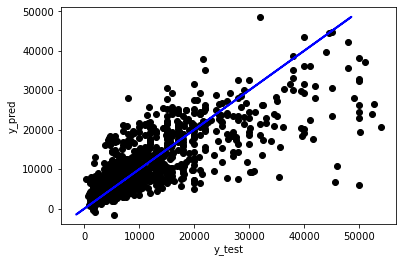

In [85]:
plt.scatter(y_test, y_pred, color="black")
plt.plot(y_pred, y_pred, color="blue", linewidth=2)
plt.xlabel("y_test")
plt.ylabel('y_pred')
plt.show()

In [86]:
def find_best_random_forest_num_estimators(X_train, y_train):
    clf=RandomForestRegressor()
    CV3=GridSearchCV(clf,{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]},scoring=make_scorer(r2_score,greater_is_better=True))
    CV3.fit(X_train, y_train)
    return CV3.best_params_['n_estimators'],CV3.best_score_

In [87]:
def split_and_train_df_Forest(df, target_column):
    y=df[target_column]
    X=df.drop(target_column, axis=1)
    X_train, X_test, y_train, y_test=train_test_split(X, y , test_size=0.3,random_state=43)
    trained_model=RandomForestRegressor(n_estimators=1600,random_state=42).fit(X_train,y_train)
    return X_train, X_test, y_train, y_test, trained_model

In [99]:
X_train, X_test, y_train, y_test, trained_model=split_and_train_df_Forest(df_linear, 'Price in India')
y_pred=trained_model.predict(X_test)
evaluationmetric=r2_score(y_test,y_pred)
evaluationmetric

0.6883213372732564

In [100]:
bestparam,bestscore=find_best_random_forest_num_estimators(X_train, y_train)
print(bestparam)
bestscore

KeyboardInterrupt: 

In [101]:
dataframe3=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
dataframe3

,y_test,y_pred
2425,5189.0,7492.704375
5,24990.0,24786.108833
639,14990.0,14132.243125
814,5000.0,7878.198125
3478,7086.0,7901.719063
...,...,...
2479,15819.0,10412.315625
3185,8998.0,11563.660260
1966,1399.0,2307.375625
1893,7100.0,10782.005625


In [102]:
evaluationmetric=r2_score(y_test,y_pred)
evaluationmetric

0.6883213372732564

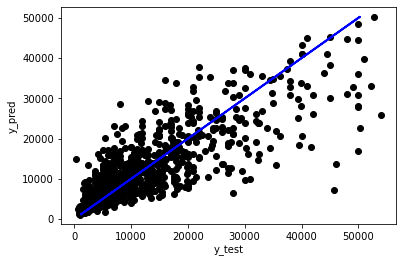

In [103]:
plt.scatter(y_test, y_pred, color="black")
plt.plot(y_pred, y_pred, color="blue", linewidth=2)
plt.xlabel("y_test")
plt.ylabel('y_pred')
plt.show()

In [104]:
def predict_price(lst,df_linear,trained_model):
    df_linear3=df_linear.copy()
    df_linear3=df_linear3.append(lst,ignore_index=True)
    df_linear3.fillna(df_linear3.mode().iloc[0], inplace=True)
    str_col_list=list(df_linear3.select_dtypes(['object']).columns)
    df_linear3=transfer_str_to_numeric_vals(df_linear3,str_col_list)
    y_pred=trained_model.predict(df_linear3.iloc[-1,:].drop(['Price in India',"url","rating"]).to_numpy().reshape(1,-1))
    return y_pred,df_linear3.iloc[-1,:].drop(['Price in India',"url","rating"])

In [105]:
prediction,x=predict_price({'Brand':'Samsung','Model':'pelephone','RAM':16,'processor_core':6,'NFC':'Yes','Number of SIMs':2},df,trained_model)
print("the prediction price with given parameter is:",prediction)
prediction,x=predict_price({'Brand':'Xiaomi','Model':'pocopoco','RAM':2,'processor_core':1,'NFC':'No','Number of SIMs':1},df,trained_model)
print("the prediction price with given parameter is:",prediction)
prediction,x=predict_price({'Brand':'ZTE','Model':'pikachi','RAM':12,'processor_core':8,'NFC':'Yes','Number of SIMs':3},df,trained_model)
print("the prediction price with given parameter is:",prediction)
prediction,x=predict_price({'Brand':'Asus','Model':'x3845','RAM':8,'processor_core':4,'NFC':'Yes','Number of SIMs':1},df,trained_model)
print("the prediction price with given parameter is:",prediction)

the prediction price with given parameter is: [17869.46161458]
the prediction price with given parameter is: [8198.055]
the prediction price with given parameter is: [18517.38614583]
the prediction price with given parameter is: [18054.16958333]


In [98]:
X_train

,Brand,Model,Release date,Form factor,Weight (g),Battery capacity (mAh),Screen size (inches),Touchscreen,RAM,Internal storage,...,SIM Type_2,GSM/CDMA_2,3G_2,4G/ LTE_2,processor_core,processor_frequency,Screen size (inches)*processor_frequency,USB OTG*processor_frequency,USB OTG*Expandable storage,RAM*processor_frequency
919,48,2791,12,6,180.000000,4300.0,6.800000,1,8.000,128.00,...,1,1,1,1,8.0,1.8,12.2400,0.0,0,14.400
967,49,3172,10,6,152.769829,3000.0,5.450000,1,2.000,32.00,...,1,1,0,0,4.0,1.5,8.1750,0.0,0,3.000
1898,111,689,8,6,135.000000,2500.0,5.000000,1,2.000,16.00,...,1,1,1,1,8.0,1.5,7.5000,0.0,0,3.000
3659,28,2285,8,6,153.000000,1850.0,4.500000,1,1.000,8.00,...,2,1,1,0,4.0,1.3,5.8500,1.3,1,1.300
993,90,1473,8,6,167.000000,3300.0,5.500000,1,3.000,32.00,...,1,1,1,1,8.0,1.6,8.8000,1.6,1,4.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,63,2922,2,0,95.000000,1200.0,2.200000,0,0.384,0.15,...,2,1,0,0,1.0,1.0,2.2000,0.0,0,0.384
3889,90,1449,14,6,152.769829,6000.0,4.942522,1,6.000,64.00,...,1,1,1,0,8.0,2.3,11.3678,0.0,0,13.800
2303,48,2206,5,6,107.000000,1540.0,3.200000,1,0.512,4.00,...,2,1,0,0,1.0,1.0,3.2000,0.0,0,0.512
3392,63,869,7,6,152.769829,3000.0,6.000000,1,1.000,8.00,...,0,1,0,0,4.0,1.3,7.8000,0.0,0,1.300


In [97]:
df.columns

Index(['Brand', 'Model', 'Price in India', 'Release date', 'Form factor',
       'Weight (g)', 'Battery capacity (mAh)', 'Screen size (inches)',
       'Touchscreen', 'RAM', 'Internal storage', 'Rear camera', 'Rear flash',
       'Wi-Fi', 'GPS', 'Bluetooth', 'NFC', 'Infrared', 'USB OTG', 'Headphones',
       'FM', 'Number of SIMs', 'Wi-Fi Direct',
       'Mobile High-Definition Link (MHL)', 'SIM Type', 'GSM/CDMA', '3G',
       '4G/ LTE', 'Compass/ Magnetometer', 'Proximity sensor', 'Accelerometer',
       'Ambient light sensor', 'Gyroscope', 'Barometer', 'url', 'rating',
       'Expandable storage', 'SIM Type_2', 'GSM/CDMA_2', '3G_2', '4G/ LTE_2',
       'processor_core', 'processor_frequency'],
      dtype='object')

In [201]:
#df.to_csv(r'C:\Users\chen0\Downloads\phone_cleaned3.csv',encoding='utf-8')
kaki=['Number of SIMs','Compass/ Magnetometer','GPS','Infrared','processor_frequency','Wi-Fi','USB OTG','Gyroscope','RAM','SIM Type_2','Expandable storage','NFC']
len(kaki)

12

In [21]:
#def median_rep(df,lst_mode):
  #  for i in lst_mode:
 #       df[i] = df[i].fillna(df[i].median())
#    return df

In [67]:
df_linear3=df.copy()
df_new=pd.DataFrame()
df_linear3=df_linear3.append({'Brand':'Samsung','Model':'pelephone','RAM':16,'processor_core':6,'NFC':'Yes','Number of SIMs':2},ignore_index=True)
df_linear3.fillna(df_linear3.mode().iloc[0], inplace=True)
str_col_list=list(df_linear3.select_dtypes(['object']).columns)
df_linear3=transfer_str_to_numeric_vals(df_linear3,str_col_list)
y_pred=trained_model.predict(df_linear3.iloc[-1,:].drop(['Price in India',"url","rating"]).to_numpy().reshape(1,-1))


In [215]:
df["Brand"].value_counts().nlargest(n=20)
df1=df[["Release date","RAM"]]
group=df.groupby(["Release date","RAM"]).sum()
group

Price in India   Weight (g)  Battery capacity (mAh)  \
Release date RAM                                                           
2008         0.128          18990.0   109.900000                  1400.0   
2009         0.256           4999.0   105.000000                  1150.0   
2010         0.064          19262.0   195.000000                  1910.0   
             0.128           8379.0    77.400000                  1050.0   
             0.256           4999.0   104.000000                  1150.0   
...                             ...          ...                     ...   
unknown      4.000         437035.0  3486.079315                 72005.0   
             5.000           7999.0   163.000000                  3000.0   
             6.000          69488.0   620.309486                 16550.0   
             8.000          63989.0   362.000000                  8300.0   
             12.000         29999.0   184.000000                  4115.0   

                     Screen size (inches)  Internal storage  Rear camera  \
Release date RAM                                                           
2008         0.128               2.400000             0.256          3.0   
2009         0.256               2.460000             0.256          2.0   
2010         0.064               4.600000             0.103          7.0   
             0.128               2.400000             0.050          5.0   
             0.256               2.460000             0.256          2.0   
...                                   ...               ...          ...   
unknown      4.000             115.870000          1216.000        371.0   
             5.000               5.700000            16.000          8.0   
             6.000              23.982522           336.000        136.0   
             8.000              12.200000           144.000         35.0   
             12.000              6.440000           256.000         48.0   

                     Number of SIMs  rating  processor_core  \
Release date RAM                                              
2008         0.128              1.0     0.0             1.0   
2009         0.256              1.0     3.8             1.0   
2010         0.064              2.0     5.0             2.0   
             0.128              1.0     0.0             1.0   
             0.256              1.0     0.0             1.0   
...                             ...     ...             ...   
unknown      4.000             38.0    59.4           145.0   
             5.000              1.0     0.0             4.0   
             6.000              8.0    16.0            32.0   
             8.000              4.0     7.6            12.0   
             12.000             2.0     0.0             8.0   

                     processor_frequency  
Release date RAM                          
2008         0.128                   2.0  
2009         0.256                   2.0  
2010         0.064                   2.0  
             0.128                   1.0  
             0.256                   1.0  
...                                  ...  
unknown      4.000                  34.7  
             5.000                   1.2  
             6.000                   6.6  
             8.000                   2.6  
             12.000                  2.4  

[124 rows x 10 columns]

In [71]:

df_classifier=df.drop(['url'],axis=1)
#df_classifier['rating']=pd.cut((df_classifier['rating']*10),range(-1,51),labels=range(0,51))


In [72]:
classifier_str_col_list=list(df_classifier.select_dtypes(['object']).columns)
df_classifier=transfer_str_to_numeric_vals(df_classifier,classifier_str_col_list)
X_train, X_test, y_train, y_test=split_and_train_classifier(df_classifier[df_classifier['Release date']!='unknown'],'Release date')


NameError: name 'split_and_train_classifier' is not defined

In [ ]:
dataframeKNN

In [ ]:
clf = KNeighborsClassifier(n_neighbors=15)
svm=clf.fit(X_train, y_train)
y_Pred=svm.predict(X_test)
print(accuracy_score(y_test,y_Pred))
dataframeKNN=pd.DataFrame({'y_test':y_test,'y_pred':y_Pred})

In [ ]:
def split_and_train_classifier(df, target_column):
    y=df[target_column]
    X=df.drop(target_column, axis=1)
    X_train, X_test, y_train, y_test=train_test_split(X, y , test_size=0.3,random_state=43)
    return X_train, X_test, y_train, y_test

In [ ]:
clf = KNeighborsClassifier(n_neighbors=15)
KNNMODEL=clf.fit(X_train, y_train)
y_Pred=KNNMODEL.predict(X_test)

dataframeKNN=pd.DataFrame({'y_test':y_test,'y_pred':y_Pred})
